✅ 成功載入資料與向量器
Train shape: (4457, 3000)
Test shape: (1115, 3000)

🚀 訓練模型: Naive Bayes
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



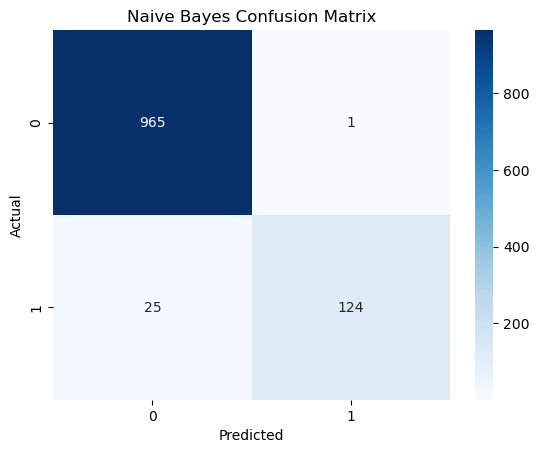


🚀 訓練模型: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



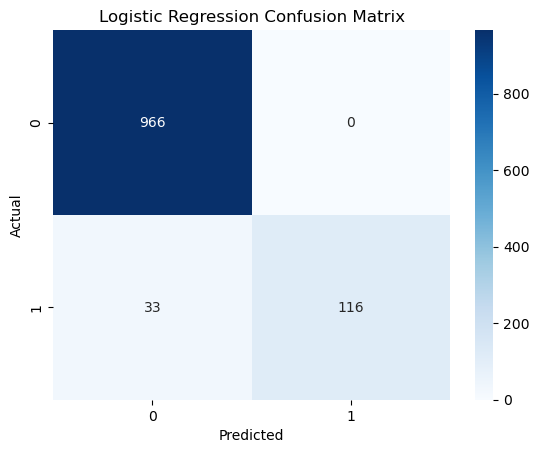


🚀 訓練模型: SVM (LinearSVC)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



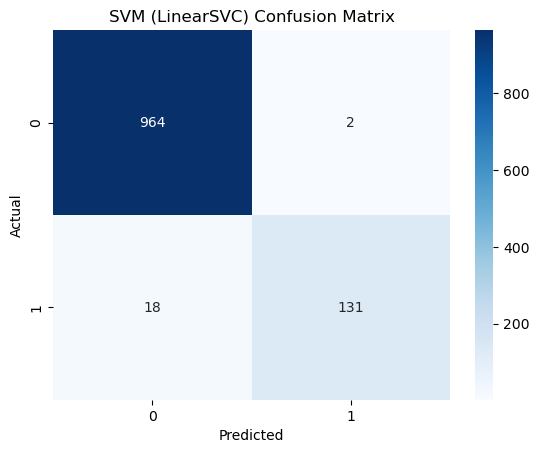


🚀 訓練模型: Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



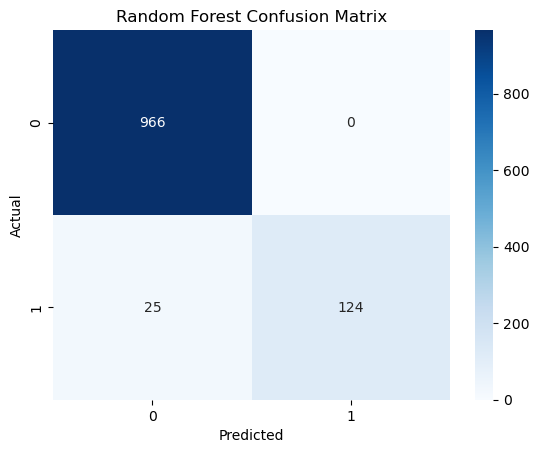

,Model,Accuracy,Precision,Recall,F1,ROC AUC
2,SVM (LinearSVC),0.982063,0.984962,0.879195,0.929078,NaN
3,Random Forest,0.977578,1.000000,0.832215,0.908425,0.981908
0,Naive Bayes,0.976682,0.992000,0.832215,0.905109,0.986369
1,Logistic Regression,0.970404,1.000000,0.778523,0.875472,0.985215


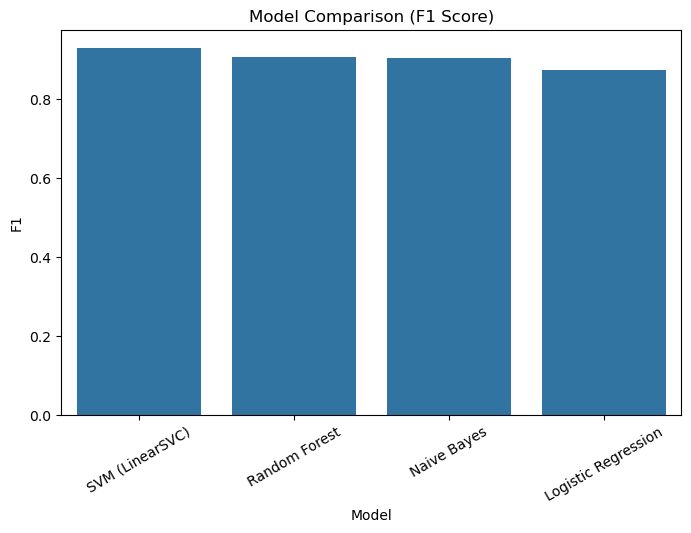

✅ 最佳模型: SVM (LinearSVC) 已儲存至 models/ 資料夾


In [2]:
# 02_model_training.ipynb

# ===========================
# 1. 匯入套件
# ===========================
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# ===========================
# 2. 載入資料
# ===========================
X_train, X_test, y_train, y_test = joblib.load("data/processed_spam_data.pkl")
vectorizer = joblib.load("models/tfidf_vectorizer.pkl")

print("✅ 成功載入資料與向量器")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ===========================
# 3. 定義要訓練的模型
# ===========================
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (LinearSVC)": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

# ===========================
# 4. 訓練與評估模型
# ===========================
for name, model in models.items():
    print(f"\n🚀 訓練模型: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except:
        roc = np.nan  # 某些模型（如 LinearSVC）無 predict_proba
    
    results.append([name, acc, prec, rec, f1, roc])
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ===========================
# 5. 比較各模型結果
# ===========================
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC AUC"])
results_df = results_df.sort_values(by="F1", ascending=False)
display(results_df)

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="F1")
plt.title("Model Comparison (F1 Score)")
plt.xticks(rotation=30)
plt.show()

# ===========================
# 6. 儲存最佳模型
# ===========================
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
joblib.dump(best_model, f"models/{best_model_name.replace(' ', '_')}.pkl")

print(f"✅ 最佳模型: {best_model_name} 已儲存至 models/ 資料夾")
